In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
def average(series):
    return np.mean(series)

In [3]:
def moving_average(series, n):
    return np.mean(series[-n:])

In [ ]:
def moving_average(arr, window):
    ret = np.cumsum(arr)
    ret[window:] = ret[window:] - ret[:-window]
    return ret[window - 1:] / window

In [12]:
def exponential_smoothing(series, alpha):
    results = np.zeros_like(series)
    results[0] = series[0] 
    for t in range(1, series.shape[0]):
        results[t] = alpha * series[t] + (1 - alpha) * results[t - 1]
    return results

In [13]:
def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(15, 7))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label='Alpha {}'.format(alpha))
    plt.plot(series, label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Exponential Smoothing')
    plt.grid(True)

In [50]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [39]:
def double_exponential_smoothing(series, alpha, beta, n_preds=1):
    n_record = series.shape[0]
    results = np.zeros(n_record + n_preds)
    level = series[0]
    results[0] = series[0]
    trend = series[1] - series[0]
    for t in range(1, n_record + 1):
        if t >= n_record:
            value = results[t - 1]
        else:
            value = series[t]

        previous_level = level
        level = alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - previous_level) + (1 - beta) * trend 
        results[t] = level + trend
    if n_preds > 1:
        results[n_record + 1:] = level + np.arange(2, n_preds + 1) * trend

    return results

In [52]:
def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(20, 8))
    for alpha, beta in zip(alphas, betas):
        results = double_exponential_smoothing(series, alpha, beta)
        print(smape(results[:-1], series))
        plt.plot(results, label='Alpha {}, beta {}'.format(alpha, beta))

    plt.plot(series, label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Double Exponential Smoothing')
    plt.grid(True)

0.7039327977303864
2.55266926714545


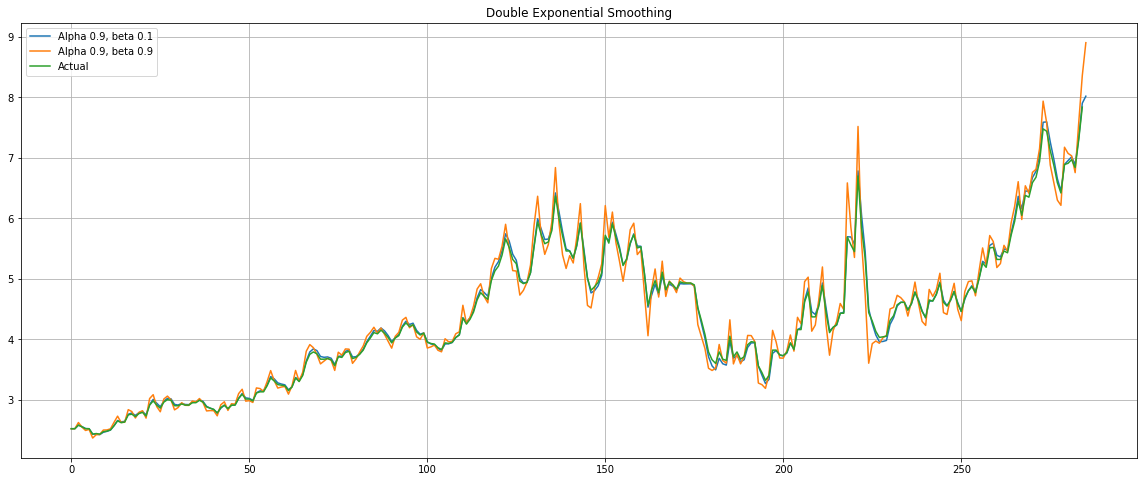

In [53]:
data = pd.read_csv('./data/daily.csv')
series = data.Price[6100:]
data.head()
plot_double_exponential_smoothing(series.values, alphas=[0.9, 0.9], betas=[0.1, 0.9])
# results = double_exponential_smoothing(series, 0.9, 0.9)
# plt.plot(results, label='Alpha {}, beta {}'.format(0.9, 0.1))